In [27]:
import pandas as pd
import numpy as np
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
import os
from data_functions import plot_data 
raw_path = '../../data/raw_data/'
clean_path = '../../data/clean_data/'

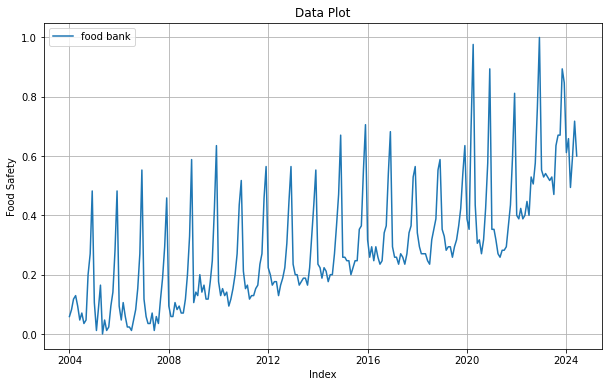

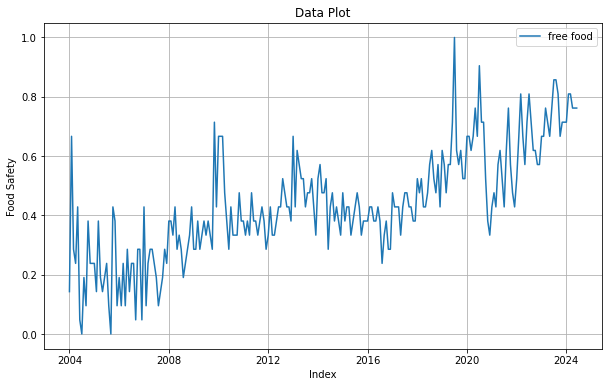

In [28]:
df2 = pd.DataFrame(pd.read_csv(raw_path+"GT_food_security.csv", encoding= 'unicode_escape')).dropna()
df2 = df2.rename(columns={"Category: All categories": "Date", "Unnamed: 1" : "food bank", "Unnamed: 2": "free food"})
df2 = df2.drop(df2.index[0])

df2['Date'] = pd.to_datetime(df2['Date'], format= "%b-%y")
df2 = df2.set_index('Date')

df2.replace('<1', 0.0001, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns, index=df2.index)

plot_data(df2["food bank"], "Food Safety", legend_label=["food bank"])
plot_data(df2["free food"], "Food Safety", legend_label=["free food"])

file_name = 'FoodSecurity.csv'
df2.to_csv(file_name, index=True)

